<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/6_XGBoost_Automobile_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 6: **XGBoost**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**XGBoost (Extreme Gradient Boosting)** es un algoritmo de ensamble basado en árboles que utiliza boosting para combinar múltiples modelos débiles.

### Ventajas:
- Alta precisión y velocidad.
- Capacidad de manejar valores faltantes automáticamente.
- Control del sobreajuste mediante regularización.
- Soporta paralelización.

### Comparación con otros modelos:

| Modelo              | Linealidad | Flexibilidad | Overfitting | Escalable | Interpretabilidad |
|---------------------|------------|--------------|-------------|-----------|-------------------|
| Regresión Lineal    | Alta       | Baja         | Baja        | Alta      | Alta              |
| Árbol de Decisión   | Baja       | Media        | Alta        | Alta      | Media             |
| Random Forest       | Baja       | Alta         | Baja        | Alta      | Baja              |
| SVR                 | Muy Baja   | Alta         | Baja        | Baja      | Baja              |
| **XGBoost**         | Baja       | **Muy Alta** | Baja        | **Alta**  | Media             |


## **1. Importar librerías y cargar datos**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [3]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. División del conjunto de datos**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenamiento del modelo XGBoost**

In [5]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## **5. Evaluación del modelo**

In [6]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 10882624.65
Coeficiente de determinación (R²): 0.91


In [7]:
import numpy as np
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse)
print(rmse)  # Aproximadamente 3298.88

3298.8823334797917


### **Interpretación**

#### **1. RMSE ≈ $3,298**

* El error promedio en la predicción de precios es de aproximdamente 3,300.
* Dado que la mayoría de tus autos están en el rango de 7,780 a 16,502, este error representa un margen relativo de aproximadamente 20% a 42%, lo cual es aceptable pero no excelente.
* Es ligeramente peor que el árbol de decisión y Random Forest en cuanto a error absoluto.

#### **2. R² = 0.91**

* XGBoost explica el 91% de la varianza en los precios.
* Aunque es un resultado muy bueno, sigue estando ligeramente por debajo del 92% obtenido con otros modelos basados en árboles.

## **6. Comparación de precios reales vs predichos**

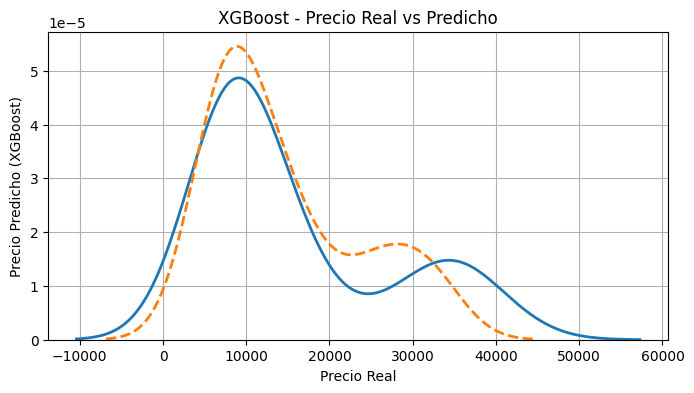

In [8]:
#plt.scatter(y_test, y_pred, color='darkred')
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (XGBoost)")
plt.title("XGBoost - Precio Real vs Predicho")
plt.grid(True)
plt.show()
